In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('dataset/heroNetwork.csv')

df = df.loc[df['hero1'] != df['hero2']]

In [3]:
heroes = nx.from_pandas_edgelist(df, source = "hero1", target = "hero2")

degrees = heroes.degree()
degrees = list(degrees)
degrees.sort(key = lambda x: x[1], reverse = True)

In [4]:
best_heroes = [x[0] for x in degrees[:1000:10]]
heroes = heroes.subgraph(best_heroes)

In [5]:
# Numero di triadi a cui ogni nodo appartiene
node_triads = nx.triangles(heroes)
node_triads = sorted(node_triads.items(), key = lambda x: x[1], reverse= True)
node_triads

[('CAPTAIN AMERICA', 582),
 ('VISION ', 524),
 ('HULK/DR. ROBERT BRUC', 433),
 ('BLACK WIDOW/NATASHA ', 422),
 ('SHADOWCAT/KATHERINE ', 321),
 ('FALCON/SAM WILSON', 302),
 ('KARNAK [INHUMAN]', 229),
 ('JACK OF HEARTS/JACK ', 227),
 ('SNOWBIRD/NARYA/ANNE ', 211),
 ('PALADIN/PAUL DENNIS', 206),
 ('REDWING', 179),
 ('SHAMROCK/MOLLY FITZG', 166),
 ('PEATOR', 164),
 ('FIRESTAR/ANGELICA JO', 160),
 ('NIGHTHAWK/KYLE RICHM', 158),
 ('DEFENSOR', 155),
 ('WEREWOLF BY NIGHT/JA', 149),
 ('SHROUD/MAXIMILLIAN Q', 137),
 ('DRUMM, JERICHO', 137),
 ('FANDRAL [ASGARDIAN]', 123),
 ('MODOK/GEORGE TARLETO', 120),
 ('LOKI [ASGARDIAN]', 115),
 ('FORGE', 111),
 ('MELTER/BRUNO HORGAN', 106),
 ('RHINO', 99),
 ('SUNSPOT/ROBERTO DACO', 95),
 ('WHIPLASH/MARK SCARLO', 94),
 ('DIAMONDBACK II/RACHE', 93),
 ('PUCK/EUGENE MILTON J', 84),
 ('NIGHTHAWK II/KYLE RI', 84),
 ('EXECUTIONER II/SKURG', 77),
 ('RAGE/ELVIN DARYL HAL', 75),
 ('VOLSTAGG', 74),
 ('ROSENTHAL, BERNIE', 71),
 ('POUNDCAKES/MARIAN PO', 62),
 ('BEREET', 6

In [34]:
#Clique totali
cliques = list(nx.enumerate_all_cliques(heroes))
len(cliques)

275911

In [9]:
# Triadi chiuse
triads = [x for x in cliques if len(x)==3]
len(triads)

2645

In [13]:
# Triadi con Captain America e Vision insieme
cap_vision = [x for x in triads if 'CAPTAIN AMERICA' in x and 'VISION ' in x]
len(cap_vision)

64

In [14]:
# Cliques con più di 3 nodi (greater equal 4)
cliques_ge4 = [x for x in cliques if len(x)>=4]
len(cliques_ge4)

272393

In [17]:
#clique massimali
maximal_cliques = list(nx.find_cliques(heroes))
len(list(nx.find_cliques(heroes)))

221

[['CAPTAIN AMERICA', 'VISION ', 'HULK/DR. ROBERT BRUC', 'BLACK WIDOW/NATASHA ', 'KARNAK [INHUMAN]', 'FALCON/SAM WILSON', 'JACK OF HEARTS/JACK ', 'PALADIN/PAUL DENNIS', 'NIGHTHAWK/KYLE RICHM', 'SHADOWCAT/KATHERINE ', 'DRUMM, JERICHO', 'REDWING', 'SHAMROCK/MOLLY FITZG', 'SHROUD/MAXIMILLIAN Q', 'WEREWOLF BY NIGHT/JA', 'PEATOR', 'SNOWBIRD/NARYA/ANNE ', 'DEFENSOR']]


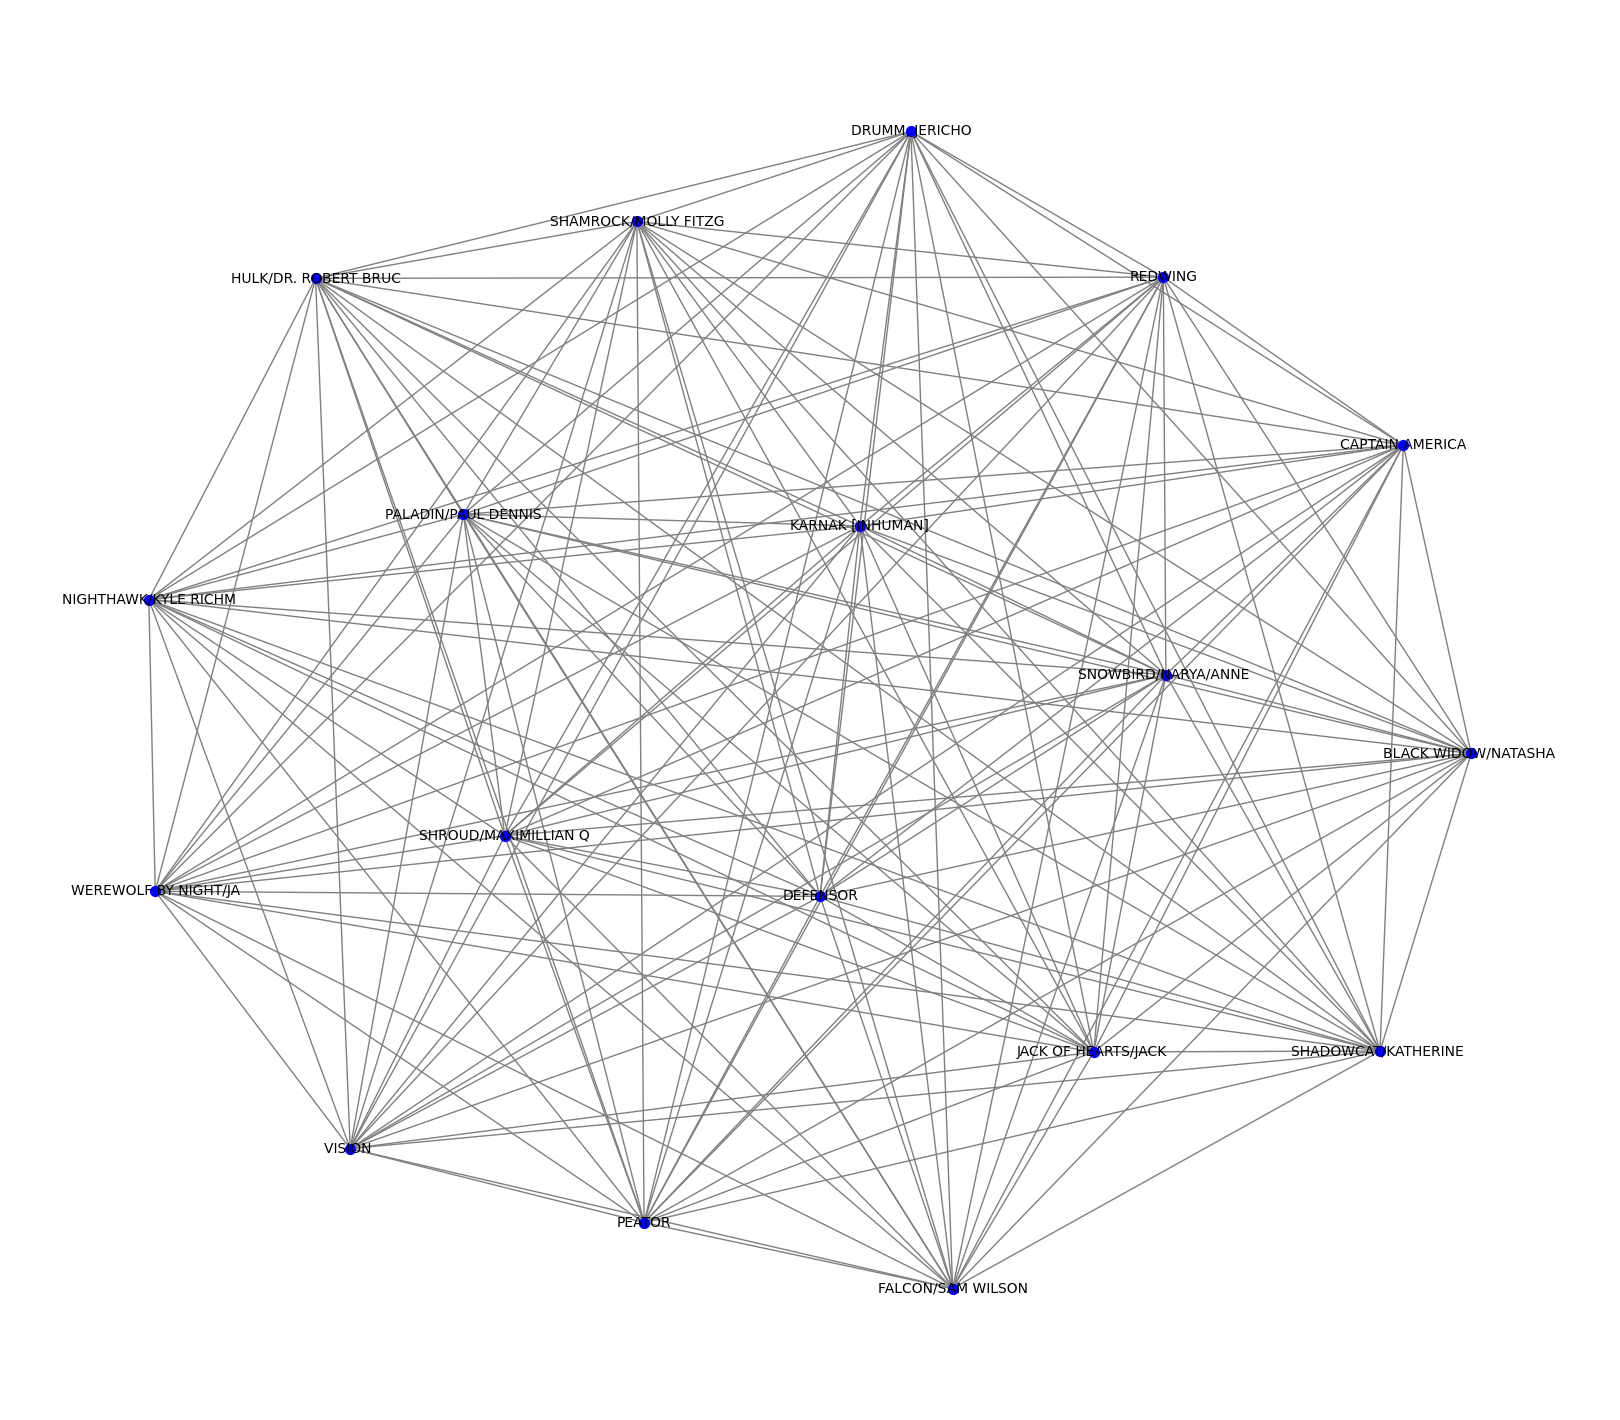

In [69]:
#Clique massima -> 18 nodi
clique_max = [x for x in maximal_cliques if len(x)>=18]
print(clique_max)

graph_clique_max = nx.subgraph(heroes, clique_max[0])
plt.figure(figsize = (16, 14))
nx.draw(graph_clique_max, with_labels = True, node_size = 50, node_color = 'blue', edge_color = 'gray', font_size = 10)

In [70]:
graph_clique_max.degree()

DegreeView({'DRUMM, JERICHO': 17, 'FALCON/SAM WILSON': 17, 'CAPTAIN AMERICA': 17, 'PALADIN/PAUL DENNIS': 17, 'REDWING': 17, 'NIGHTHAWK/KYLE RICHM': 17, 'SHAMROCK/MOLLY FITZG': 17, 'SHROUD/MAXIMILLIAN Q': 17, 'WEREWOLF BY NIGHT/JA': 17, 'HULK/DR. ROBERT BRUC': 17, 'JACK OF HEARTS/JACK ': 17, 'KARNAK [INHUMAN]': 17, 'DEFENSOR': 17, 'PEATOR': 17, 'SNOWBIRD/NARYA/ANNE ': 17, 'SHADOWCAT/KATHERINE ': 17, 'BLACK WIDOW/NATASHA ': 17, 'VISION ': 17})

In [98]:
#K-core
len(nx.k_core(heroes, k = 17).nodes())

18

In [76]:
#core number
core = nx.core_number(heroes)
core = sorted(core.items(), key = lambda x: x[1], reverse = True)
core

[('PEATOR', 17),
 ('FALCON/SAM WILSON', 17),
 ('WEREWOLF BY NIGHT/JA', 17),
 ('SHADOWCAT/KATHERINE ', 17),
 ('PALADIN/PAUL DENNIS', 17),
 ('SHROUD/MAXIMILLIAN Q', 17),
 ('BLACK WIDOW/NATASHA ', 17),
 ('DRUMM, JERICHO', 17),
 ('DEFENSOR', 17),
 ('REDWING', 17),
 ('HULK/DR. ROBERT BRUC', 17),
 ('SHAMROCK/MOLLY FITZG', 17),
 ('CAPTAIN AMERICA', 17),
 ('JACK OF HEARTS/JACK ', 17),
 ('SNOWBIRD/NARYA/ANNE ', 17),
 ('VISION ', 17),
 ('NIGHTHAWK/KYLE RICHM', 17),
 ('KARNAK [INHUMAN]', 17),
 ('BEREET', 11),
 ('DIAMONDBACK II/RACHE', 11),
 ('FANDRAL [ASGARDIAN]', 11),
 ('WHIPLASH/MARK SCARLO', 11),
 ('EXECUTIONER II/SKURG', 11),
 ('RAGE/ELVIN DARYL HAL', 11),
 ('MODOK/GEORGE TARLETO', 11),
 ('HOGAN, VIRGINIA PEPP', 11),
 ('RHINO', 11),
 ('ROSENTHAL, BERNIE', 11),
 ('MELTER/BRUNO HORGAN', 11),
 ('RATTLER', 11),
 ('LOKI [ASGARDIAN]', 11),
 ('POUNDCAKES/MARIAN PO', 11),
 ('NIGHTHAWK II/KYLE RI', 11),
 ('MIRAGE', 11),
 ('FIRESTAR/ANGELICA JO', 11),
 ('FORGE', 10),
 ('BATTLESTAR/LEMAR HOS', 10),
 ('P